In [ ]:
import pandas as pd

# データを読み込む
data = pd.read_csv('0290459-220831081235567.csv')

# 国ごとの観測回数を計算する
country_counts = data['countryCode'].value_counts()

country_counts.head()


ParserError: ignored

In [ ]:
# CSVの先頭部分を確認
with open('0290459-220831081235567.csv', 'r', encoding='utf-8') as f:
    lines = [f.readline().strip() for _ in range(10)]

lines


['gbifID\tdatasetKey\toccurrenceID\tkingdom\tphylum\tclass\torder\tfamily\tgenus\tspecies\tinfraspecificEpithet\ttaxonRank\tscientificName\tverbatimScientificName\tverbatimScientificNameAuthorship\tcountryCode\tlocality\tstateProvince\toccurrenceStatus\tindividualCount\tpublishingOrgKey\tdecimalLatitude\tdecimalLongitude\tcoordinateUncertaintyInMeters\tcoordinatePrecision\televation\televationAccuracy\tdepth\tdepthAccuracy\teventDate\tday\tmonth\tyear\ttaxonKey\tspeciesKey\tbasisOfRecord\tinstitutionCode\tcollectionCode\tcatalogNumber\trecordNumber\tidentifiedBy\tdateIdentified\tlicense\trightsHolder\trecordedBy\ttypeStatus\testablishmentMeans\tlastInterpreted\tmediaType\tissue',
 '920335393\t6ac3f774-d9fb-4796-b3e9-92bf6c81c084\t\tPlantae\tTracheophyta\tLiliopsida\tAsparagales\tAsphodelaceae\tAloe\tAloe vera\t\tSPECIES\tAloe vera (L.) Burm.f.\tAloe vera\t\tES\tLas Palmas de Gran Canaria\t\tPRESENT\t\tbb646dff-a905-4403-a49b-6d378c2cf0d9\t28.12392\t-15.431671\t250.0\t\t\t\t\t\t2011-04-

In [ ]:
# タブ区切りでデータを読み込む
data = pd.read_csv('0290459-220831081235567.csv', sep='\t')

# 国ごとの観測回数を計算する
country_counts = data['countryCode'].value_counts()

country_counts.head()


MX    521
ES    427
US    266
BR    186
IN    144
Name: countryCode, dtype: int64

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 世界の地図データを読み込む
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 国コードを基に地図データと結合
world = world.set_index('iso_a2').join(country_counts)

# ヒートマップを表示
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='countryCode', ax=ax, legend=True,
           legend_kwds={'label': "Number of Observations"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})

plt.title('Number of Aloe Vera Observations by Country')
plt.show()


<ipython-input-8-401319396a43>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


KeyError: ignored

In [ ]:
# 地図データのカラムを確認
world.columns


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

<ipython-input-10-e3eac80e8387>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


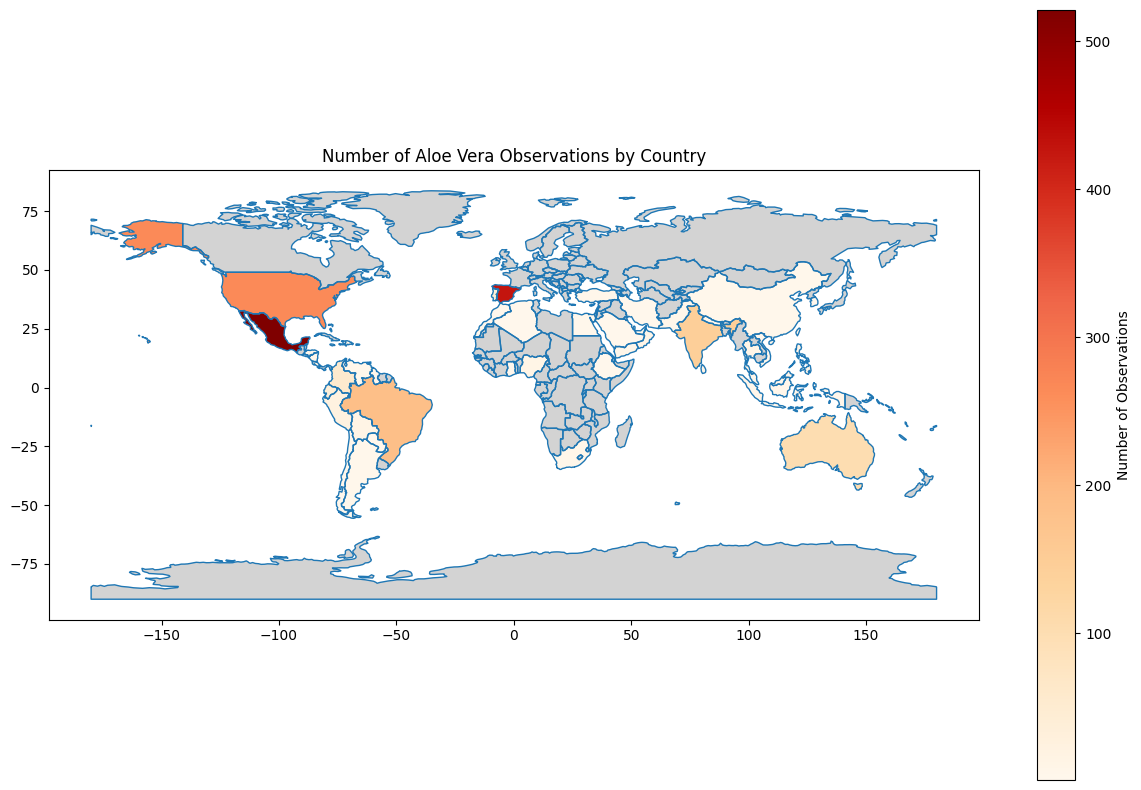

In [ ]:
# iso_a2 (2文字の国コード) と iso_a3 (3文字の国コード) のマッピングを作成
country_code_mapping = {
    'MX': 'MEX', 'ES': 'ESP', 'US': 'USA', 'BR': 'BRA', 'IN': 'IND',
    'ZA': 'ZAF', 'ID': 'IDN', 'TH': 'THA', 'CL': 'CHL', 'PE': 'PER',
    'VE': 'VEN', 'AU': 'AUS', 'MY': 'MYS', 'PH': 'PHL', 'MA': 'MAR',
    'AR': 'ARG', 'PK': 'PAK', 'DZ': 'DZA', 'NP': 'NPL', 'TZ': 'TZA',
    'KE': 'KEN', 'NG': 'NGA', 'UY': 'URY', 'VN': 'VNM', 'CR': 'CRI',
    'CO': 'COL', 'JP': 'JPN', 'EC': 'ECU', 'LK': 'LKA', 'TT': 'TTO',
    'UG': 'UGA', 'JM': 'JAM', 'BD': 'BGD', 'GH': 'GHA', 'PR': 'PRI',
    'PT': 'PRT', 'KR': 'KOR', 'SA': 'SAU', 'AE': 'ARE', 'TR': 'TUR',
    'TW': 'TWN', 'BW': 'BWA', 'ZW': 'ZWE', 'LB': 'LBN', 'ET': 'ETH',
    'IQ': 'IRQ', 'OM': 'OMN', 'IL': 'ISR', 'PY': 'PRY', 'SG': 'SGP',
    'IR': 'IRN', 'DO': 'DOM', 'BO': 'BOL', 'EG': 'EGY', 'CN': 'CHN',
    'AG': 'ATG', 'HN': 'HND', 'MT': 'MLT', 'RU': 'RUS', 'ZM': 'ZMB',
    'NI': 'NIC', 'YE': 'YEM', 'GU': 'GUM', 'JO': 'JOR', 'AW': 'ABW',
    'KW': 'KWT', 'SY': 'SYR', 'BH': 'BHR', 'QA': 'QAT', 'GD': 'GRD',
    'HT': 'HTI', 'CY': 'CYP', 'VI': 'VIR', 'VC': 'VCT', 'GY': 'GUY',
    'SV': 'SLV', 'CW': 'CUW', 'BB': 'BRB', 'BM': 'BMU', 'KY': 'CYM',
    'BZ': 'BLZ', 'KN': 'KNA', 'LC': 'LCA', 'TT': 'TTO', 'VG': 'VGB'
}

# 2文字の国コードを3文字の国コードに変換
data['iso_a3'] = data['countryCode'].map(country_code_mapping)

# 3文字の国コードを基に地図データと結合
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('iso_a3').join(data['iso_a3'].value_counts())

# ヒートマップを再表示
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='iso_a3', ax=ax, legend=True,
           legend_kwds={'label': "Number of Observations"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})

plt.title('Number of Aloe Vera Observations by Country')
plt.show()
